# MNIST Dataset

## 데이터셋

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

(10000, 28, 28)
(10000, 28, 28)


## 신경망 구성

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
%%time

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                 epochs=10, batch_size=100, verbose=1)

Epoch 1/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2064 - accuracy: 0.9378 - val_loss: 0.1469 - val_accuracy: 0.9564
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1278 - accuracy: 0.9630 - val_loss: 0.1125 - val_accuracy: 0.9664
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0925 - accuracy: 0.9736 - val_loss: 0.0898 - val_accuracy: 0.9724
Epoch 4/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0702 - accuracy: 0.9796 - val_loss: 0.0803 - val_accuracy: 0.9758
Epoch 5/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0542 - accuracy: 0.9848 - val_loss: 0.0748 - val_accuracy: 0.9759
Epoch 6/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0430 - accuracy: 0.9874 - val_loss: 0.0748 - val_accuracy: 0.9759
Epoch 7/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0331 - accuracy: 0.9909 - val_loss: 0.0664 - val_accuracy: 0.9796
Epoch 

## accuracy와 loss 시각화

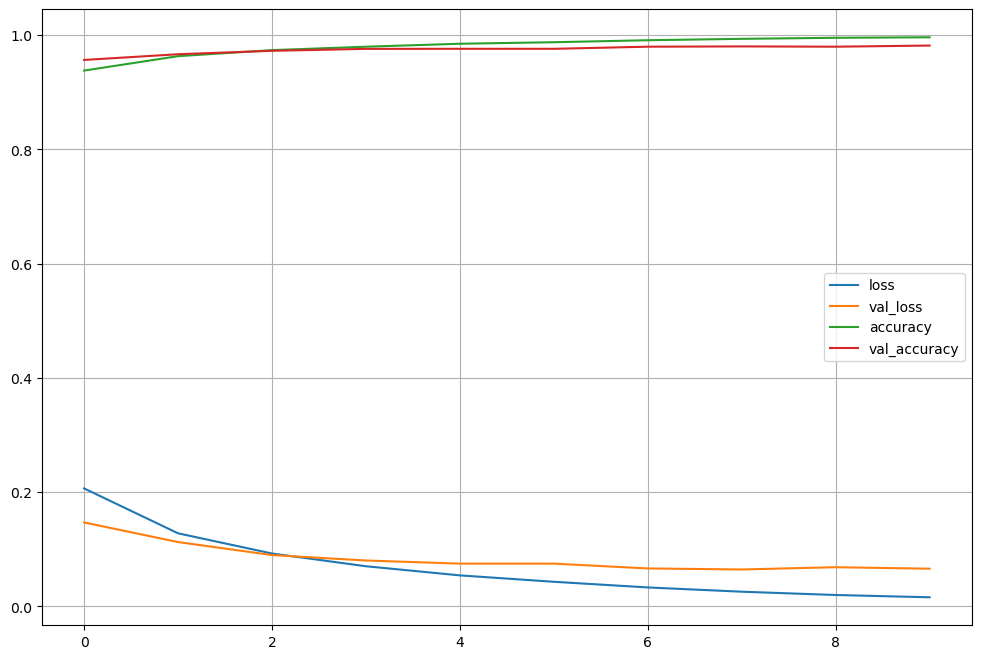

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12, 8))

for each in plot_target :
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

## evaluate

In [10]:
score = model.evaluate(x_test, y_test)

print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

313/313 [==============================] - 0s 977us/step - loss: 0.0659 - accuracy: 0.9816
Test loss :  0.06587855517864227
Test accuracy :  0.9815999865531921


In [16]:
import numpy as np

predicted_result = model.predict(x_test)

predicted_result[0]

313/313 [==============================] - 0s 842us/step


array([5.8643444e-08, 5.1797073e-09, 2.0386083e-06, 4.9881649e-04,
       6.0789915e-11, 7.7664719e-09, 1.5127896e-13, 9.9948764e-01,
       1.7463310e-07, 1.1203249e-05], dtype=float32)

In [17]:
np.argmax(predicted_result[0])

7

In [19]:
predicted_labels = np.argmax(predicted_result, axis=1)

print(predicted_labels[:10])
print(y_test[:10])

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


In [20]:
wrong_result = []

for n in range(0, len(y_test)) :
    if predicted_labels[n] != y_test[n] :
        wrong_result.append(n)

len(wrong_result)

184

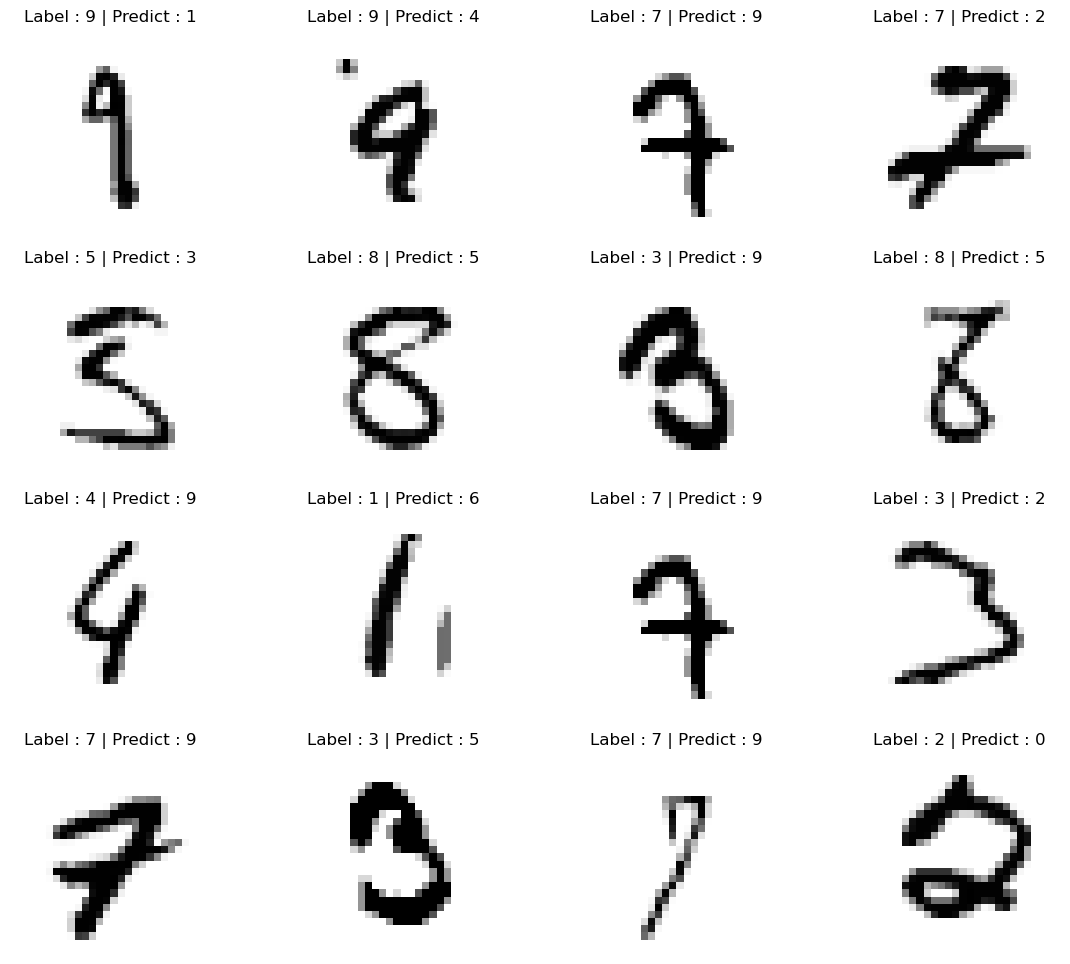

In [24]:
import random

samples = random.choices(population=wrong_result, k=16)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples) :
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys')
    plt.title('Label : ' + str(y_test[n]) + ' | Predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()